## VAST Source Query & Analysis

This Notebook is for testing Radio lightcurve plotting for crossmatched VAST sources, printing png cutouts for said sources, as well as producing an eta-V scatterplot for a family of sources to see the variability and statistical significance of them.

At the moment, with the current imports and code, plotting Radio lightcurves and producing png cutouts for a given source is working ok. eta-V plots are functional, but take a long time to produce. The current goal is to produce a kernel density distribution in lieu of a scatterplot to save having to replot everything everytime I want to see how a specific family of transients fares under the statistical analysis.

In [1]:
import os
import requests
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from vasttools.pipeline import Pipeline
from vasttools.query import Query
from bokeh.io import output_notebook
from bokeh.plotting import show
from astropy.coordinates import Angle, SkyCoord
from astropy import units as u
output_notebook()

Loading BokehJS ...

In [2]:
cmf = pd.read_pickle('Fink_2020_sources_matched_to_VAST_all_sources.pickle')

In [4]:
AGN_Family=[
'AGN',
'AGN_Candidate',
'QSO',
'QSO_Candidate',
'Seyfert',
'Seyfert_1',
'Seyfert_2',
'Blazar',
'BLLac',
'Blazar_Candidate',
'RadioG',
'LINER'
]

Unknown_Family=[
'Unknown'
]

Galaxy_Family=[
'Galaxy',
'EmG',
'HII_G',
'GroupG',
'GinGroup',
'GinCl',
'GinPair',
'BClG',
'PartofG'
]

Stars_Family=[
'Star',
'RRLyr',
'Candidate_RRLyr',
'EB*',
'Candidate_EB*',
'WD*',
'LMXB',
'CataclyV*',
'low-mass*'
]

Supernovae_Family=[
'SN',
'SN candidate'
]

Spectral_Family=[
'Radio',
'Radio(cm)', #split into radio and non radio/multiwavelength
'Blue',
'UV',
'X'
]

Solar_System_Family=[
'Solar System',
'Solar System MPC',
'Solar System candidate',
]

In [5]:
Source_Families=[] #define an empty array
for i, row in cmf.iterrows(): #'i' represents the first index in cmf.iterrows, 'row' is the second
    x=row['class'] #this pulls out the class column from eachrow
    for j in AGN_Family: #for all the classes listed in the AGN family
        if x==j: #if it matches the class of the row
            Source_Families.append('AGN') #add 'AGN' to the empty array
    else: #otherwise, check the other families to see if it matches
        for j in Unknown_Family:
            if x==j:
                Source_Families.append('Unknown')
        else:
            for j in Galaxy_Family:
                if x==j:
                    Source_Families.append('Galaxy')
            else:
                for j in Stars_Family:
                    if x==j:
                        Source_Families.append('Star')
                else:
                    for j in Supernovae_Family:
                        if x==j:
                            Source_Families.append('Supernova')
                    else:
                        for j in Spectral_Family:
                            if x==j:
                                Source_Families.append('Spectral')
                        else:
                            for j in Solar_System_Family:
                                if x==j:
                                    Source_Families.append('Other')
#the new column                                     
cmf['family']=Source_Families

In [6]:
print(cmf.groupby('family').size().sort_values(ascending=False))

family
AGN          827
Unknown      516
Galaxy       167
Spectral     109
Other         81
Supernova     51
Star          21
dtype: int64


In [7]:
family_list=cmf.query('family == "Supernova"')

In [8]:
#This will automatically find the base directory that needed to be specified in method 1
pipe=Pipeline()
#this way, we can also load specific runs from the VAST pipeline:
my_run=pipe.load_run('tiles_corrected')

/opt/conda/lib/python3.9/site-packages/vasttools/pipeline.py:2609: UserWarning: Measurements have been loaded with vaex.
  warnings.warn("Measurements have been loaded with vaex.")


In [9]:
#since matched id list is a list of strings, astype() converts them into intergers first
matched_ids=family_list['matched_id'].astype('int64').to_list()

In [10]:
#locating sources in the 'tiles_corrected' run that have the same id
my_sources=my_run.sources.loc[matched_ids]
my_sources

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,n_neighbour_dist,vs_abs_significant_max_peak,m_abs_significant_max_peak,vs_abs_significant_max_int,m_abs_significant_max_int,n_measurements,n_selavy,n_forced,n_siblings,n_relations
id,,,,,,,,,,,,,,,,,,,,,
3247514,298.485427,2.068151,1.754479,25.113852,51.204381,0.000092,0.000092,24.700400,14.088300,15.578000,...,0.020036,0.000000,0.000000,0.000000,0.000000,10,10,0,0,0
3737714,48.237637,-10.276692,1.133116,7.787402,15.069767,0.000102,0.000102,13.432327,12.047054,13.924000,...,0.084986,0.000000,0.000000,0.000000,0.000000,11,10,1,0,0
3181790,331.398656,-8.367385,1.296548,5.223650,9.602362,0.000147,0.000147,2.430900,1.906300,2.439000,...,0.013494,0.000000,0.000000,0.000000,0.000000,10,10,0,0,0
4128194,203.077119,-5.295297,1.685826,59.379775,105.370834,0.000099,0.000099,43.957375,26.128625,27.772000,...,0.008492,4.879821,0.095565,10.721761,0.386848,8,8,0,8,0
3733243,327.677999,-9.708212,1.078696,519.187592,686.021912,0.000088,0.000088,382.697101,354.816701,369.587000,...,0.000133,28.857164,0.070602,35.173362,0.133691,10,10,0,2,1
3937443,60.148046,-7.447927,1.054288,9.559252,19.901961,0.000098,0.000098,4.281727,4.051000,5.072000,...,0.042691,4.377175,0.406072,0.000000,0.000000,11,11,0,0,0
3523122,297.667918,-7.338789,1.043217,25.354167,36.198777,0.000087,0.000087,11.967545,11.480273,13.519000,...,0.005666,4.636937,0.218685,0.000000,0.000000,11,11,0,1,0
3394836,38.875342,-9.353960,1.464699,4.430730,5.059880,0.000101,0.000101,2.044357,1.802557,2.210543,...,0.059644,0.000000,0.000000,0.000000,0.000000,10,3,7,0,0
3236991,137.194993,-4.320237,11.632700,4.801120,5.911111,0.000097,0.000097,4.418526,-0.865474,3.187333,...,0.001722,14.065258,50.759680,14.065258,50.759680,11,3,8,3,1


In [11]:
#getting info from specific source
star_source=my_run.get_source(3520508)

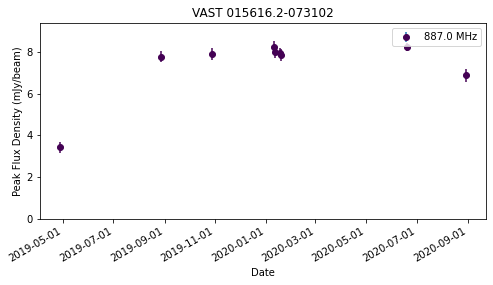

In [12]:
#plotting the light curve of that specific source
star_source.plot_lightcurve()

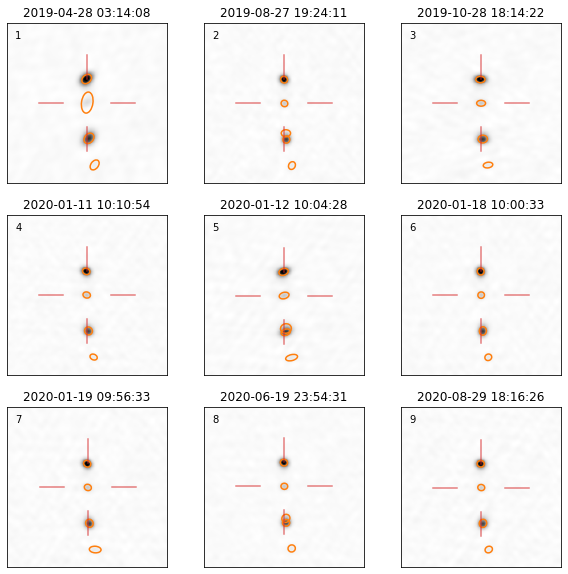

In [13]:
star_source.show_all_png_cutouts(columns=3, figsize=(10,10))

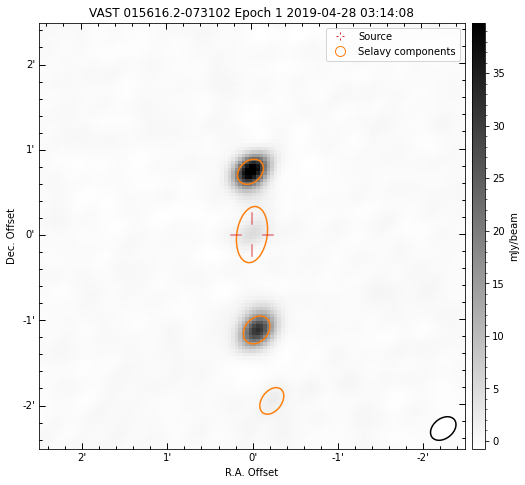

In [14]:
star_source.show_png_cutout('1')

## Eta - V plotting:

In [15]:
#this is just a template query string. Feel free to modify for different science goals.
my_query_string = (
    "n_measurements >= 3 "
    "& n_selavy >= 2 " # source finder ~ ML
    "& n_neighbour_dist > 1./60."
    "& 0.8 < avg_compactness < 1.4 "
    "& n_relations == 0"
    "& max_snr >= 5.0"
    "& v_peak > 0"
)

In [16]:
#eta_thresh, v_thresh, eta_v_candidates, plot_1 = my_run.run_eta_v_analysis(
#    1.0, 
#    1.0, 
#    query=my_query_string
#)
#print(eta_thresh, v_thresh)

In [17]:
#just remember to run output_notebook() from bokeh in order to plot the results
#show(plot_1)

In [18]:
#this is a test for plotting subsets of the pipeline onto an eta-V plot:
eta_thresh, v_thresh, eta_v_candidates, plot_2 = my_run.run_eta_v_analysis(
    1.0, 
    1.0, 
    query=my_query_string,
    plot_type='matplotlib'
)
print(eta_thresh, v_thresh)
len(eta_v_candidates)

2.315552652171963 0.2878888414273631


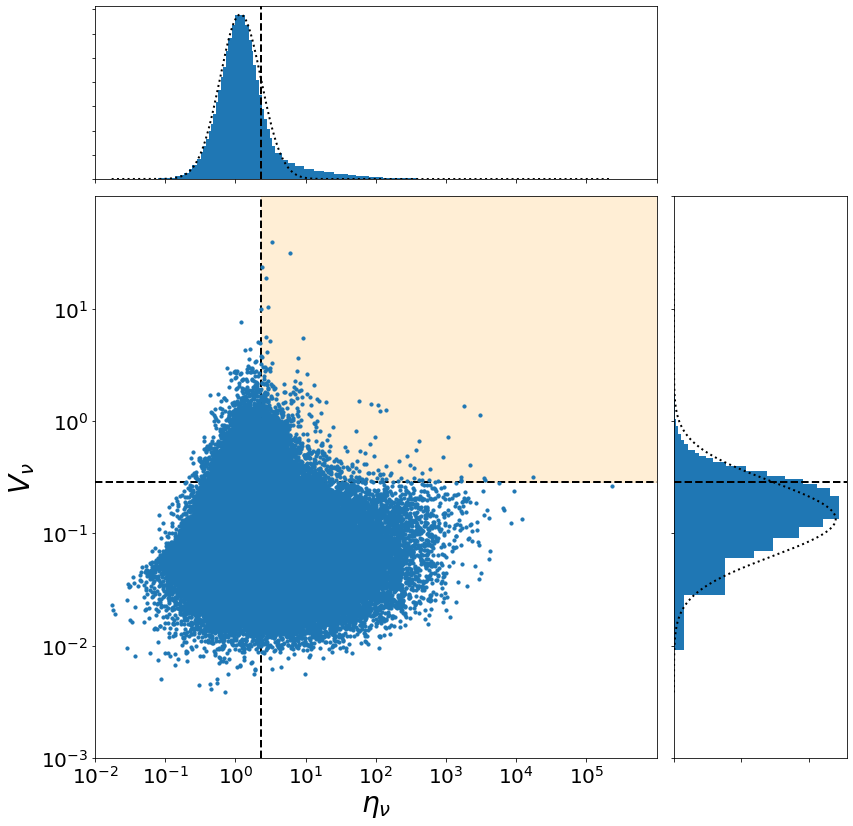

In [19]:
plot_2

At this point, we've plotted all the radio sources from the run with SNR>0 onto the plot. It takes a very long time for the analysis to finish. Dougal has suggested using a kernel density estimate that, while taking a long time, can be saved and replotted instantaneously. (kind of like saving a png)

Now, I want to plot the crossmatched FINK sources on this plot at the same time

In [22]:
#This makes a list of all the matched_id's as intergers
listFinkmatched = cmf.matched_id.astype(int).values.tolist()
listFinkmatched

#should be the same length as the original crossmatched source file
len(listFinkmatched)

1772

In [23]:
#this creates an arrray of sources from my_run that have the same ids as the catalogue, with the necessary eta and V information
#for the plot
sel=my_run.sources[my_run.sources.index.isin(listFinkmatched)]
print(len(sel))

1711


Im noticing the length of 'listFinkmatched' and 'sel' are not the same, which I think means some crossmatched sources are not present in the run 'tiles_corrected'

In [24]:
#plot_2.axes[0] gives the axes for the plot, .scatter makes the scatterplot. since the axes are logarithmic (base 10), we
#have to take the log10 of each value of "eta_peak" and "v_peak" from sel.
plot_2.axes[0].scatter(np.log10(sel["eta_peak"]),np.log10(sel["v_peak"]), color='red',zorder=100)

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


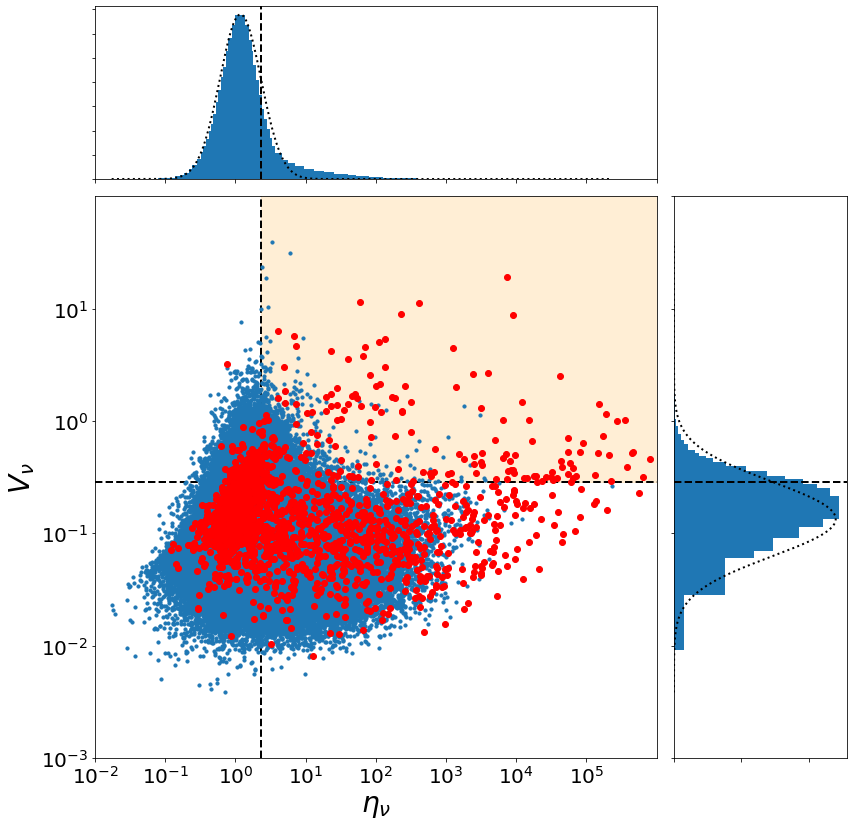

In [25]:
plot_2

Next, I want to try and take a subset of the plotted FINK sources under a particular family (like AGN) to see how the distribution looks:

In [26]:
#simillar method as before, Im going to define the set of matched ids from the catalogue that belong to the AGN family
listFinkmatched_AGN=cmf.query('family == "AGN"').matched_id.astype(int).values.tolist()

#again, the length of this should be equal to the number of AGN family sources in the original catalogue
len(listFinkmatched_AGN)

827

In [27]:
#same as before, define a new array of selected sources, this time for AGNS:
sel_AGN=my_run.sources[my_run.sources.index.isin(listFinkmatched_AGN)]

#Im noticing the length of these selected ids are a bit smaller than the full ammount
len(sel_AGN)

795

In [28]:
#finally, plot them as before. This time the dots are green to differentiate them from the other plot:
plot_2.axes[0].scatter(np.log10(sel_AGN["eta_peak"]),np.log10(sel_AGN["v_peak"]), color='green',zorder=100)

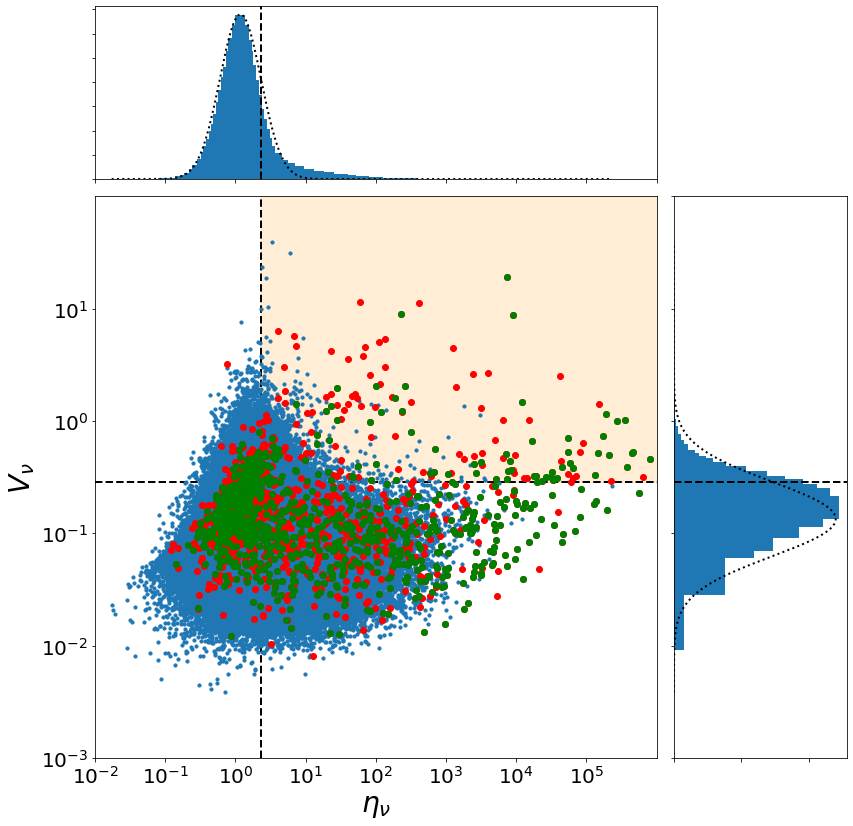

In [29]:
plot_2

It seems like the distribution of AGNs is fairly uniform and in line with the majority of the catalogue. I would like to clean this up and just have one family plotted at a time, without having previous plots overlayed ontop of eachother